# Predicting House Prices

This dataset contains house sale prices for King County

Target: Use different models to verify which model calculates the best prediction of houses prices. 
The exploratory analysis was made in another section

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Read dataset

In [4]:
df_house = pd.read_csv('../src/data/house_prices.csv', parse_dates = ['date'],
                        dtype = {'id': np.str_,
                                'price': np.float32,
                                'bedrooms': np.float32,
                                'bathrooms': np.float32,
                                'sqft_living': np.float32,
                                'sqft_lot': np.int32, 
                                'floors': np.float32,
                                'waterfront': np.float32,
                                'view': np.float32,
                                'condition': np.float32,
                                'grade': np.float32,
                                'sqft_above': np.float32,
                                'sqft_basement': np.float32,
                                'yr_built': np.float32,
                                'yr_renovated': np.float32,
                                'zipcode': np.float32,
                                'lat': np.float32,
                                'long': np.float32,
                                'sqft': np.float32,
                                'living15': np.float32,
                                'sqft_lot15': np.float32,       
                    } 
)



In [5]:
df_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650,1.00,0.00,0.00,3.00,7.00,1180.00,0.00,1955.00,0.00,98178.00,47.51,-122.26,1340,5650.00
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242,2.00,0.00,0.00,3.00,7.00,2170.00,400.00,1951.00,1991.00,98125.00,47.72,-122.32,1690,7639.00


In [14]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Drop string 

In [16]:
dCol = ['id', 'date', 'zipcode']
df_house.drop(dCol, axis=1, inplace=True)
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.00,3.00,1.00,1180.00,5650,1.00,0.00,0.00,3.00,7.00,1180.00,0.00,1955.00,0.00,47.51,-122.26,1340,5650.00
1,538000.00,3.00,2.25,2570.00,7242,2.00,0.00,0.00,3.00,7.00,2170.00,400.00,1951.00,1991.00,47.72,-122.32,1690,7639.00
2,180000.00,2.00,1.00,770.00,10000,1.00,0.00,0.00,3.00,6.00,770.00,0.00,1933.00,0.00,47.74,-122.23,2720,8062.00
3,604000.00,4.00,3.00,1960.00,5000,1.00,0.00,0.00,5.00,7.00,1050.00,910.00,1965.00,0.00,47.52,-122.39,1360,5000.00
4,510000.00,3.00,2.00,1680.00,8080,1.00,0.00,0.00,3.00,8.00,1680.00,0.00,1987.00,0.00,47.62,-122.04,1800,7503.00


In [17]:
# Full Sample target variable and independent variables
X = df_house.drop(['price'], axis = 1)
y = df_house['price']

Splitting train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

Metric function

In [45]:
from sklearn.metrics import mean_absolute_percentage_error

In [46]:
# Model Evaluation
def calculate_metrics(y_true, y_predicted): 
    acc_linreg = metrics.r2_score(y_true, y_predicted)
    print('R^2:', acc_linreg)
    print('MAE:',metrics.mean_absolute_error(y_true, y_predicted))
    print('MSE:',metrics.mean_squared_error(y_true, y_predicted))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_predicted)))
    print('MAPE:', mean_absolute_percentage_error(y_true, y_predicted))

In [60]:
def diff_between_actual_predicted(y_true, y_pred):
    # Visualizing the differences between actual prices and predicted values
    plt.scatter(y_true, y_pred)
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices")
    plt.show()

In [151]:
def compare(original, prediction):
    teste = pd.DataFrame()
    teste['Original'] = original
    teste['Prediction'] = prediction
    sns.kdeplot(data=teste)

# 1) Linear regression

In [78]:
# Import library for Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [79]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [80]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [81]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.6974131270161023
MAE: 126513.86071942045
MSE: 40784716569.965706
RMSE: 201952.26309691533
MAPE: 0.2572709553229739


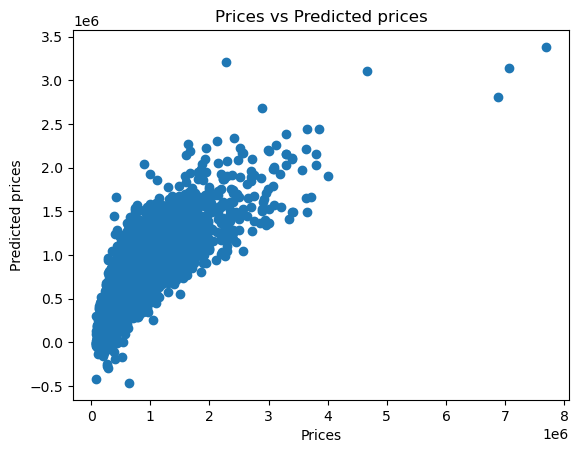

In [82]:
diff_between_actual_predicted(y_train, y_pred)

In [83]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [84]:
# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.6902064004232786
MAE: 126041.44175996377
MSE: 41739226977.27169
RMSE: 204301.80365643298
MAPE: 0.2511361489707442


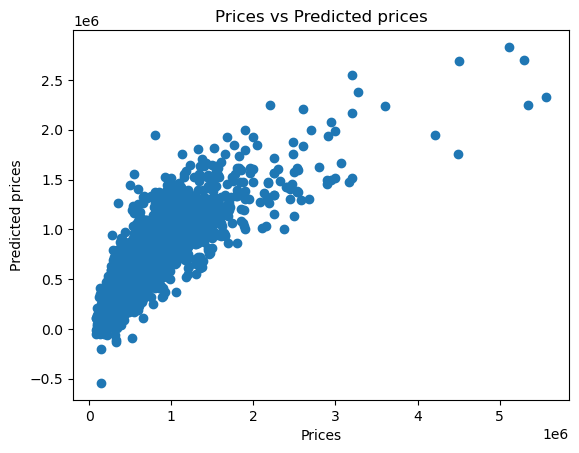

In [85]:
diff_between_actual_predicted(y_test, y_test_pred)

# 2) Polynomial Regeression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

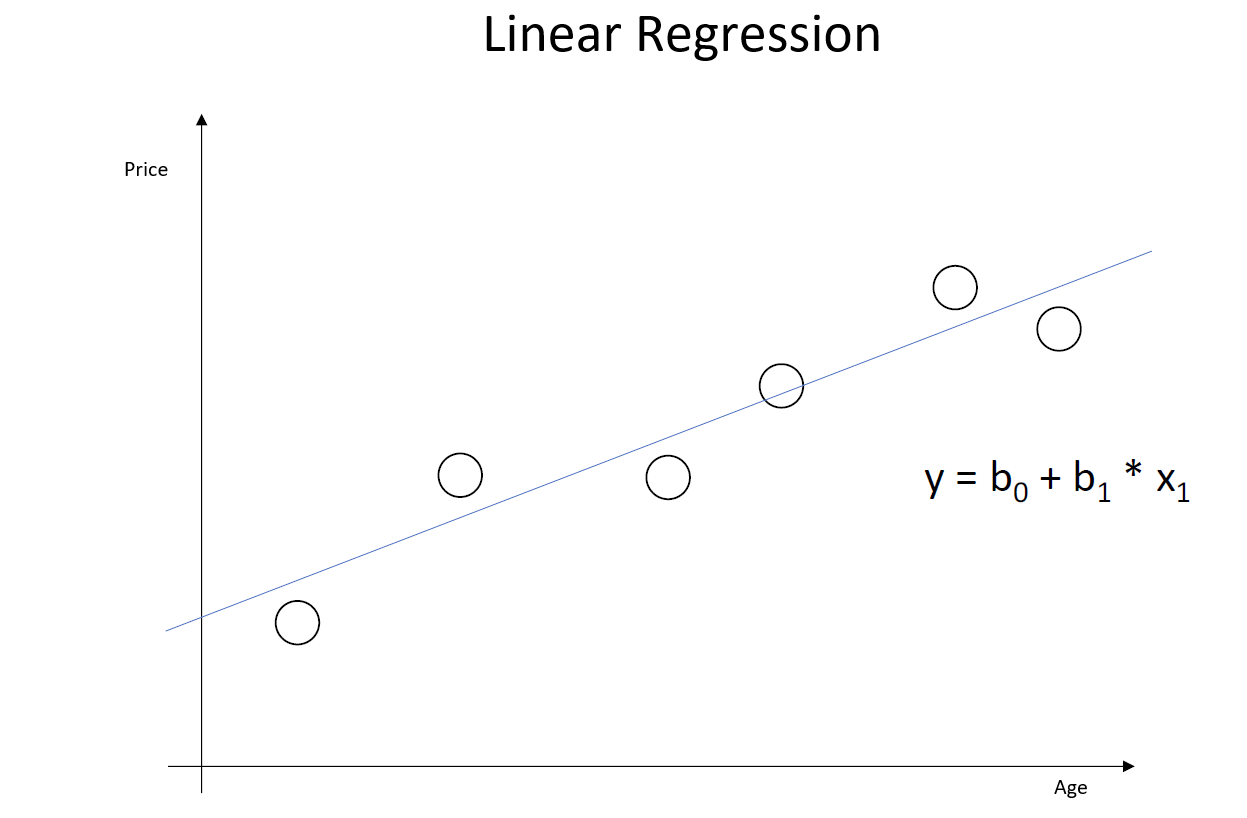

In [29]:
from IPython.display import Image, display
display(Image('../src/img/poly.png', width=500, height=300))

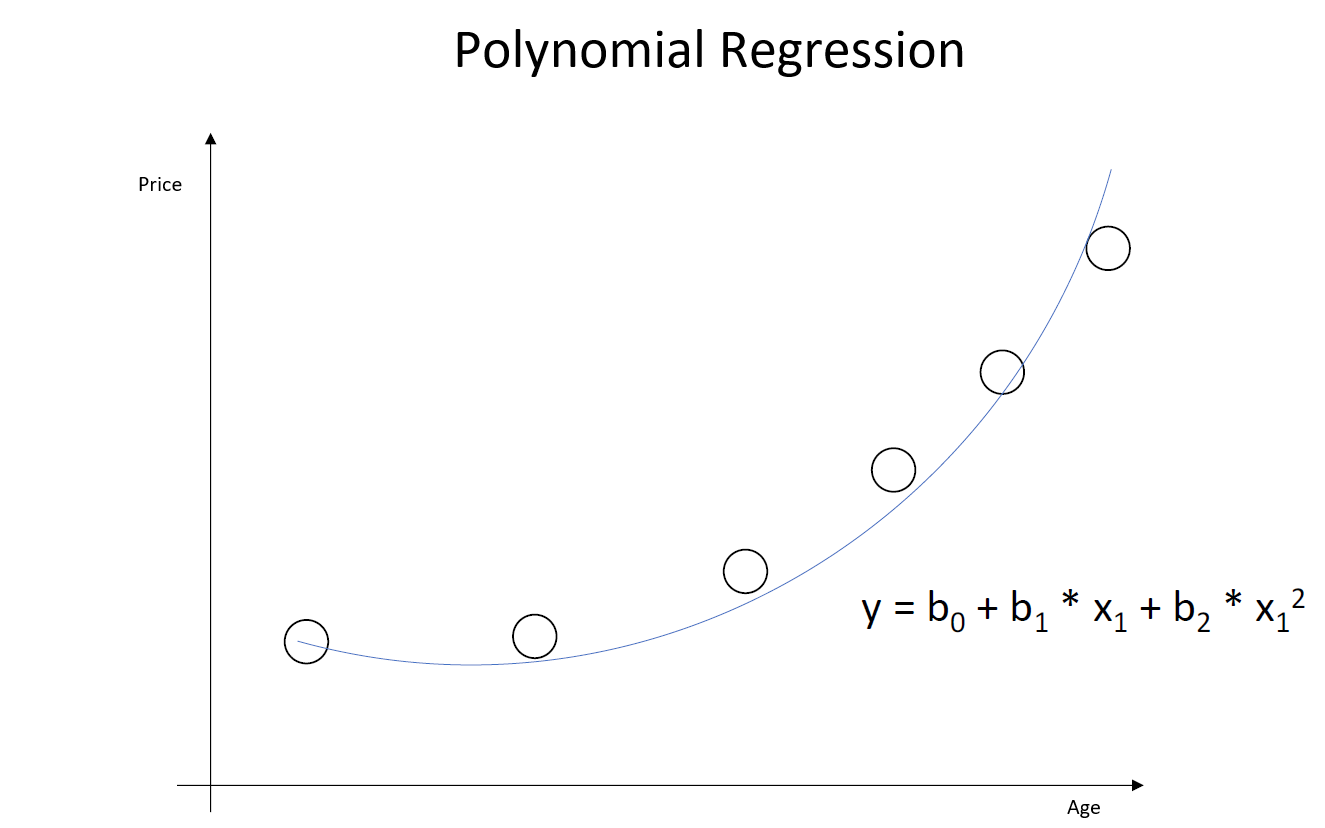

In [31]:
from IPython.display import Image, display
display(Image('../src/img/poly_2.png', width=500, height=300))

In [48]:
# Create the polinomial ajust
poly = PolynomialFeatures(degree = 4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [49]:
X_train_poly.shape

(15129, 5985)

In [50]:
X_train.shape

(15129, 17)

In [51]:
# Create a Linear regressor
lm_poly = LinearRegression()

# Train the model using the training sets 
lm_poly.fit(X_train_poly, y_train)

LinearRegression()

In [74]:
# Model prediction on train data
y_pred = lm_poly.predict(X_train_poly)

In [75]:
calculate_metrics(y_train, y_pred)

R^2: 0.8595575255998593
MAE: 92506.6201275603
MSE: 18929791819.155396
RMSE: 137585.57998262535
MAPE: 0.1902148498543659


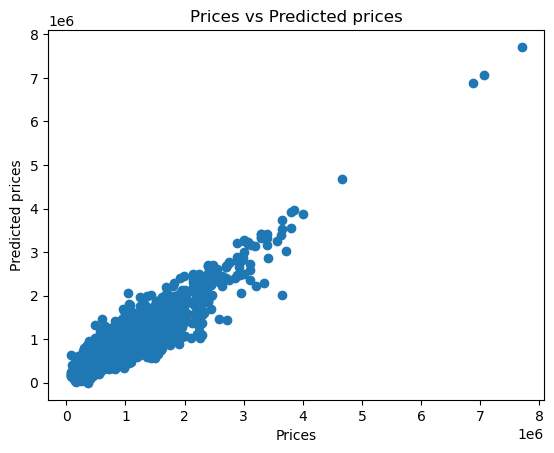

In [76]:
diff_between_actual_predicted(y_train, y_pred)

In [72]:
# Model prediction on train data
y_test_pred = lm_poly.predict(X_test_poly)

In [73]:
calculate_metrics(y_test, y_test_pred )

R^2: -286.03921533644666
MAE: 295478.3605202031
MSE: 38673474780226.484
RMSE: 6218800.107756036
MAPE: 0.5222999497669301


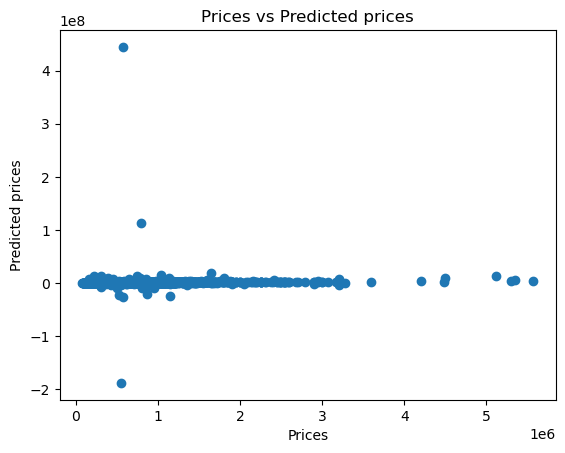

In [77]:
diff_between_actual_predicted(y_test, y_test_pred)

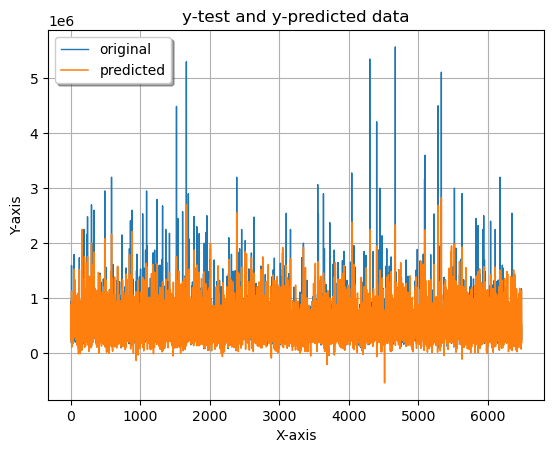

In [86]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

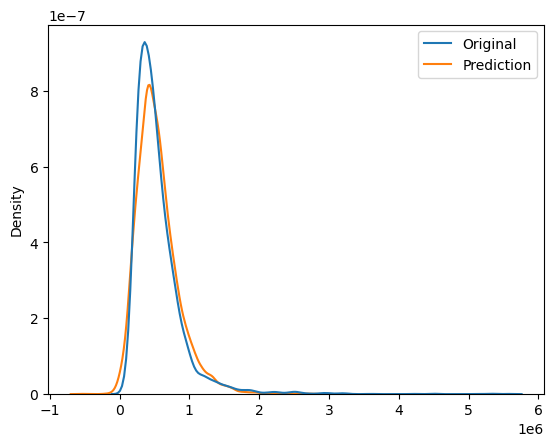

In [152]:
compare(y_test, y_test_pred)

# 3) Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [96]:
# Create the regressor
model = Ridge()

# Train the model using the training sets 
model.fit(X_train, y_train)

Ridge()

In [99]:
# Model prediction on train data
y_pred = model.predict(X_train)

In [100]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.6974108302037807
MAE: 126502.56682976634
MSE: 40785026149.95054
RMSE: 201953.02956368477
MAPE: 0.2572084505483075


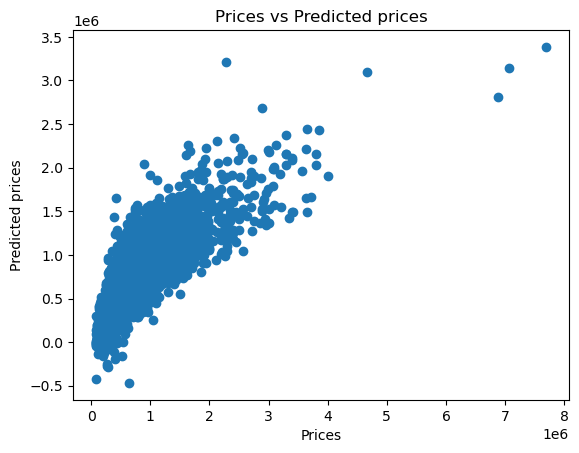

In [101]:
diff_between_actual_predicted(y_train, y_pred)

In [103]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

In [104]:
# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.6901769405584057
MAE: 126028.47299908994
MSE: 41743196174.79008
RMSE: 204311.51747953438
MAPE: 0.2510707645368847


# 4) Lasso Regression

In [105]:
from sklearn.linear_model import Lasso

In [158]:
# Create the regressor
model = Lasso(max_iter=500)

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)


c:\Users\marci\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.810e+14, tolerance: 2.039e+11
  model = cd_fast.enet_coordinate_descent(


In [159]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.6974131247565967
MAE: 126513.02598226465
MSE: 40784716874.517235
RMSE: 201952.26385093393
MAPE: 0.25726707775564195


In [161]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.6902059797290533
MAE: 126040.43152475225
MSE: 41739283658.40321
RMSE: 204301.94237550267
MAPE: 0.2511319549481409


# 5)  Support Vector Regression

In [162]:
from sklearn.svm import SVR

In [163]:
# Create the regressor
model = SVR(kernel = 'rbf')

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)

In [164]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: -0.058547896609453476
MAE: 222072.51886279188
MSE: 142678284464.92905
RMSE: 377727.79149134504
MAPE: 0.4266664094458946


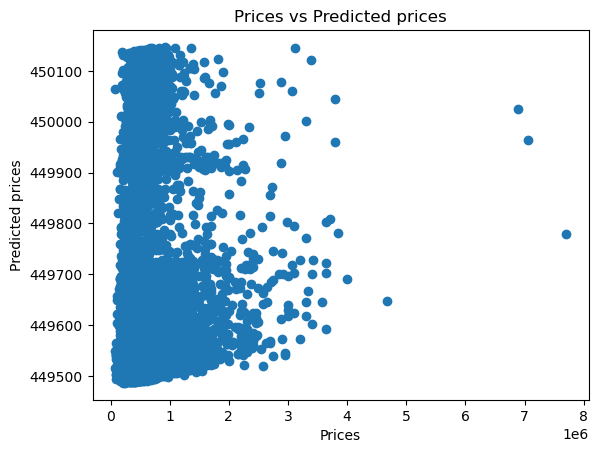

In [165]:
diff_between_actual_predicted(y_train, y_pred)

In [166]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: -0.06562445889848934
MAE: 221164.51052331604
MSE: 143574112645.54285
RMSE: 378911.74783258286
MAPE: 0.4201661873042103


# 6) Nearest Neighbors Regression

In [167]:
from sklearn.neighbors import KNeighborsRegressor

In [168]:
# Create the regressor
model = KNeighborsRegressor()

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)



In [169]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.6638746433664888
MAE: 129119.25
MSE: 45305262000.0
RMSE: 212850.33
MAPE: 0.2571907


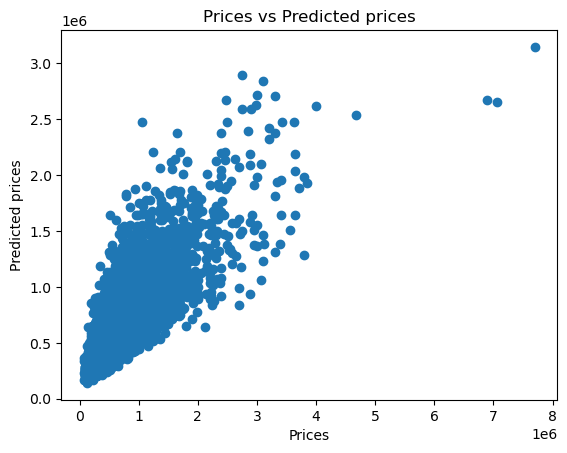

In [171]:
diff_between_actual_predicted(y_train, y_pred)

In [172]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.4946885338576774
MAE: 159996.8
MSE: 68081810000.0
RMSE: 260924.92
MAPE: 0.3158173


# 7) Decision tree

In [173]:
from sklearn.tree import DecisionTreeRegressor

In [174]:
# Create the regressor
model = DecisionTreeRegressor()

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)

In [175]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)


R^2: 0.9993927405515683
MAE: 852.465529777249
MSE: 81850558.30243242
RMSE: 9047.129837823288
MAPE: 0.0028188956112948486


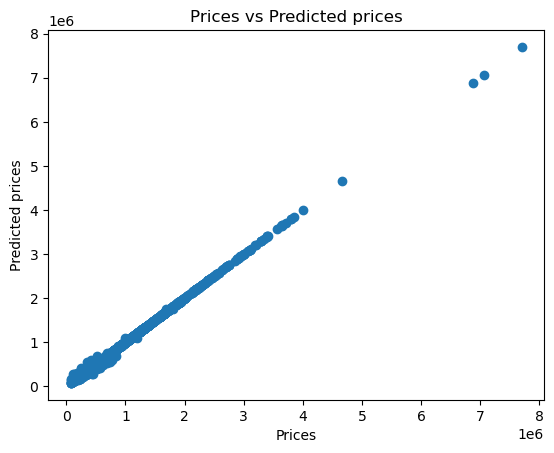

In [176]:
diff_between_actual_predicted(y_train, y_pred)

In [177]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)


R^2: 0.7388451128347485
MAE: 97620.47609500309
MSE: 35186017808.33336
RMSE: 187579.36402582604
MAPE: 0.17761525223612243


# 8) Random Forest

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
# Create the regressor
model = RandomForestRegressor()

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)

In [181]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)


R^2: 0.9817267504155518
MAE: 26493.014350855654
MSE: 2462992851.4897094
RMSE: 49628.548754620155
MAPE: 0.050305237586011936


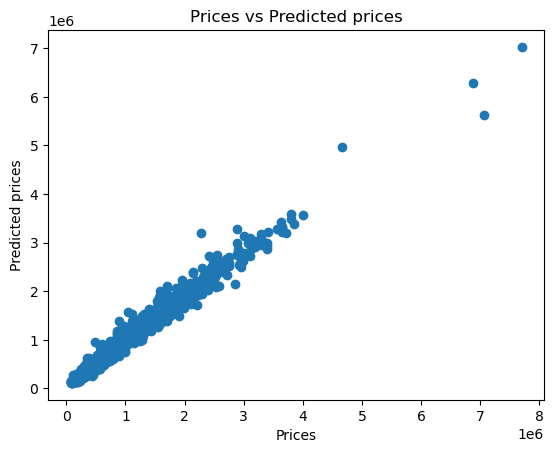

In [182]:
diff_between_actual_predicted(y_train, y_pred)


In [183]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.8594729179766196
MAE: 71645.62745534061
MSE: 18933547307.11583
RMSE: 137599.22713124455
MAPE: 0.1318515041945991


# 9) Extreme  Gradient Boosting (XGBoost)

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [185]:
# Create the regressor
model = GradientBoostingRegressor()

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)

In [186]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.8999298913287748
MAE: 73744.46504902471
MSE: 13488129802.308964
RMSE: 116138.40795494385
MAPE: 0.14574809772754527


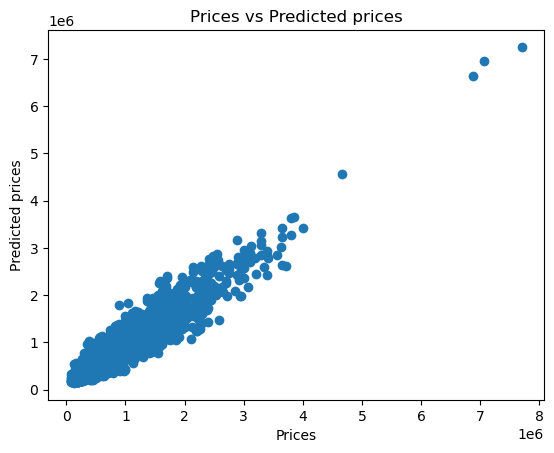

In [187]:
diff_between_actual_predicted(y_train, y_pred)

In [188]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)

R^2: 0.8628451920035325
MAE: 78807.59165491592
MSE: 18479192823.255623
RMSE: 135938.19486537116
MAPE: 0.14928321926139335


# 10) Neural Network

In [189]:
from sklearn.neural_network import MLPRegressor

In [190]:
# Create the regressor
model = MLPRegressor()

# Train the model using the training sets 
model.fit(X_train, y_train)

# Model prediction on train data
y_pred = model.predict(X_train)


In [191]:
# Model Evaluation - Train
calculate_metrics(y_train, y_pred)

R^2: 0.5161284839210218
MAE: 169892.79269689266
MSE: 65219493644.75869
RMSE: 255381.0753457638
MAPE: 0.350409217583535


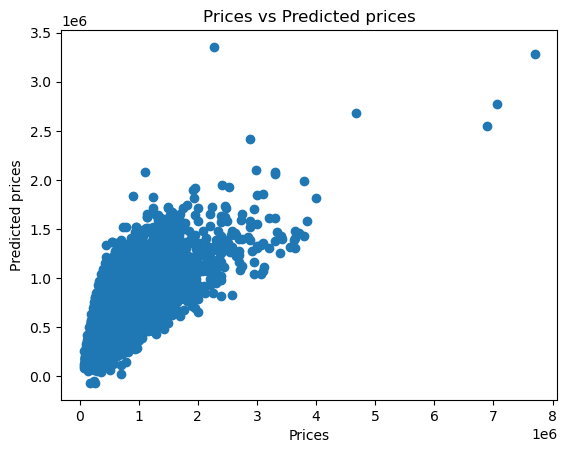

In [192]:
diff_between_actual_predicted(y_train, y_pred)

In [193]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

# Model Evaluation - Test
calculate_metrics(y_test, y_test_pred)


R^2: 0.5096770110930784
MAE: 169105.0841920976
MSE: 66062380094.75685
RMSE: 257026.0299945452
MAPE: 0.3468214396107531


# Conclusion

The Random Forest was the best model with MAPE: 0.1318515041945991 for this dataset. 
Some models could be improved by tuning the parameters with grid-search or changing the estimator.